# Homework 2 - 95-791 Data Mining (Fall 2021) 
## Name: Yifan Zhou 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, r2_score, roc_curve, roc_auc_score
from sklearn import preprocessing
from sklearn import neighbors 
import time

# set warnings off
import warnings
warnings.filterwarnings('ignore')
from statistics import mean

%matplotlib inline
plt.style.use('seaborn-white')

---
### Task 1. Data Processing 
Loading and pre-processing the dataset.

**1)a) Load the `worldHappiniess` dataset into a dataframe called `wh`. Check that there are no missing values in the dataset.** 

In [2]:
wh = pd.read_csv("worldHapinness_2015_2020.csv")
print(wh.isnull().sum(axis = 0)) 
print("Number of Missing Values: %1.0f"%wh.isnull().sum().sum()) # check if there is null
wh = wh.dropna(axis=0) # drop na
print("Number of Missing Values: %1.0f"%wh.isnull().sum().sum()) # check again. Null has been dropped
print('\nThere are {} diiferent countries/areas in this dataset.'.format(len(wh['country'].unique())))
print('There are {} instances in this dataset.'.format(wh.shape[0]))
wh = wh.drop('country', axis = 1)
wh.head(5)

country               0
Regional indicator    2
happinessScore        0
GDPperCap             0
socialSupport         0
healthLE              0
freedom               0
generosity            0
trustGovernment       1
year                  0
dtype: int64
Number of Missing Values: 3
Number of Missing Values: 0

There are 172 diiferent countries/areas in this dataset.
There are 932 instances in this dataset.


,Regional indicator,happinessScore,GDPperCap,socialSupport,healthLE,freedom,generosity,trustGovernment,year
0,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


**1)b) Mutate dummy variables for category variables.** 

In [3]:
wh = wh.rename(columns = {'Regional indicator': 'Region'}) 
data_encoded=pd.get_dummies(data=wh.Region,drop_first=True, prefix = 'Region') # mutate catogorical into dummy variables
wh = pd.concat([wh, data_encoded], axis = 1)
wh = wh.drop('Region', axis = 1)
wh.head(5)

,happinessScore,GDPperCap,socialSupport,healthLE,freedom,generosity,trustGovernment,year,Region_Commonwealth of Independent States,Region_East Asia,Region_Latin America and Caribbean,Region_Middle East and North Africa,Region_North America and ANZ,Region_South Asia,Region_Southeast Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,0,0,0,0,0,0,0,0,1
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,0,0,0,0,0,0,0,0,1
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,0,0,0,0,0,0,0,0,1
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,0,0,0,0,0,0,0,0,1
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,0,0,0,0,0,0,0,0,1


**1)c) Clean column names.** 

In [4]:
wh.columns = wh.columns.str.replace(' ', '_')
wh.columns = wh.columns.str.replace('-', '_')
wh.head()

,happinessScore,GDPperCap,socialSupport,healthLE,freedom,generosity,trustGovernment,year,Region_Commonwealth_of_Independent_States,Region_East_Asia,Region_Latin_America_and_Caribbean,Region_Middle_East_and_North_Africa,Region_North_America_and_ANZ,Region_South_Asia,Region_Southeast_Asia,Region_Sub_Saharan_Africa,Region_Western_Europe
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,0,0,0,0,0,0,0,0,1
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,0,0,0,0,0,0,0,0,1
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,0,0,0,0,0,0,0,0,1
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,0,0,0,0,0,0,0,0,1
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,0,0,0,0,0,0,0,0,1


In [5]:
data_2020 = wh[wh.year == 2020]
wh = wh[wh.year != 2020] # pretend there are no data for 2020. use the rest X and y for training

---
### Task 2. Data Summary
Get to know the data before analysis.

**2)a) Data description.** 

In [6]:
print(wh.describe())
years = wh['year'].unique()
years.sort()
print('The time range is ', years, '.')

       happinessScore   GDPperCap  socialSupport    healthLE     freedom  \
count      779.000000  779.000000     779.000000  779.000000  779.000000   
mean         5.376377    0.915578       1.079376    0.612987    0.410771   
std          1.128037    0.404650       0.329733    0.248135    0.152809   
min          2.693000    0.000000       0.000000    0.000000    0.000000   
25%          4.508500    0.608000       0.870456    0.440305    0.310005   
50%          5.321000    0.982000       1.125000    0.647380    0.431000   
75%          6.178000    1.235374       1.329000    0.808579    0.531000   
max          7.769000    1.870766       1.644000    1.141000    0.724000   

       generosity  trustGovernment         year  \
count  779.000000       779.000000   779.000000   
mean     0.218586         0.125220  2016.994865   
std      0.122510         0.105802     1.417835   
min      0.000000         0.000000  2015.000000   
25%      0.130000         0.054000  2016.000000   
50%      

Text(0.5, 1.0, 'Distribution of happiness score in 2019')

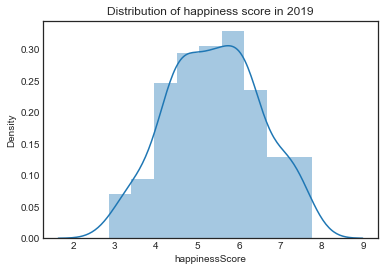

In [7]:
sns.distplot(wh[wh.year == 2019]["happinessScore"])
plt.title('Distribution of happiness score in 2019') 

Looks like a normal distribution.

**2)b) Correlations.** 

Text(0.5, 1.0, 'heatmap of correlations')

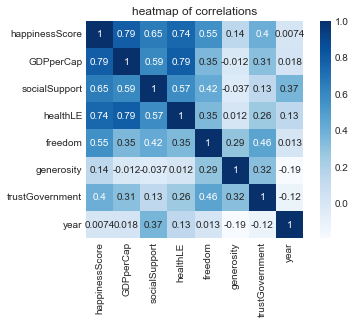

In [8]:
sns.heatmap(wh[['happinessScore', 'GDPperCap', 'socialSupport', 'healthLE', 'freedom', 'generosity', 'trustGovernment', 'year']].corr(),annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')#heatmap of correlations
plt.title('heatmap of correlations')

There is high correlation between GDP, health, and happiness (>0.7).

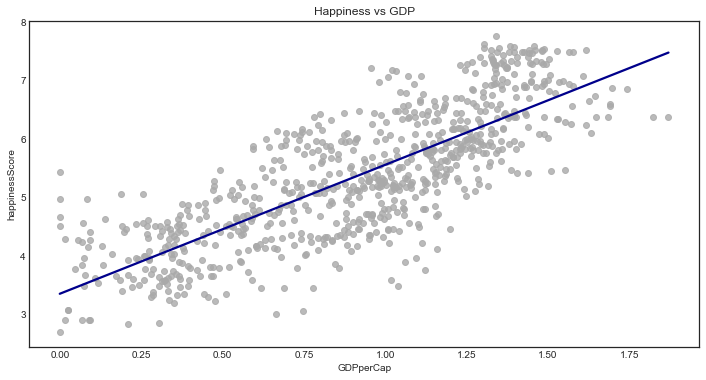

In [9]:
plt.figure(figsize=(12,6))
lmplot = sns.regplot(x="GDPperCap",y="happinessScore",data=wh, ci=None, order=1, 
            scatter_kws={"color": "darkgrey"}, line_kws={"color": "darkblue"})
lmplot.set(xlabel='GDPperCap', 
           ylabel='happinessScore',
           title='Happiness vs GDP')
plt.show(lmplot)

### Task 3. Training
Predict the happiness score in 2020. I am going to use linear regression, polynomial regression, lasso, and ridge regression.

#### 3.1 Linear Regression


3.1) a) Split the dataset without 2020 data into `X` and `y` dataframe, and then split into `X_train`, `X_test`, `y_train` and `y_test`. Use a 80-20 ratio for the split and a random_state = 12.

In [10]:
# split the x and y for training
X = wh[wh.columns.difference(['happinessScore'])]
y = wh['happinessScore']
print('The shape of X is{}. The shape of y is{}'.format(X.shape, y.shape))
# split training and test withing the larger training (year 2020 excluded)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
print('The shape of X_train is{}. The shape of X_test is{}. The shape of y_train is{}. The shape of y_test is{}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

The shape of X is(779, 16). The shape of y is(779,)
The shape of X_train is(623, 16). The shape of X_test is(156, 16). The shape of y_train is(623,). The shape of y_test is(156,)


3.1) b) Fit the model and cross validation

In [11]:
# fit linear model with training
lm = LinearRegression()
lm.fit(X_train, y_train)

# performance on training set
y_true = y_train
y_pred = lm.predict(X_train)
print('The train MSE fot this validation is: ', mean_squared_error(y_true, y_pred))
print("The train R-squared fot this validation is: ", lm.score(X_train,y_train))

# performance on test set
y_true = y_test
y_pred = lm.predict(X_test)
print('The test MSE fot this validation is: ', mean_squared_error(y_true, y_pred))
print("The test R-squared fot this validation is: ", lm.score(X_test,y_test))

# cross validation useing k-folder = 10
linear_MSE_all = -mean(cross_val_score(LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=10))
print('The mean MSE of K_folder cross validation with k = 10 for Linear regression is: ', linear_MSE_all)

The train MSE fot this validation is:  0.2312067636665316
The train R-squared fot this validation is:  0.8188675808724262
The test MSE fot this validation is:  0.2340333088359913
The test R-squared fot this validation is:  0.8125326537013003
The mean MSE of K_folder cross validation with k = 10 for Linear regression is:  0.2721419180694528


3.1) c) Check for multicollinearity

In [12]:
# get the regression formula
all_columns = "+".join(wh.columns.difference(["happinessScore"]))
multi_formula = "happinessScore ~ " + all_columns
lm_all = smf.ols(formula=multi_formula, data=wh).fit()
lm_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         happinessScore   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     214.4
Date:                Tue, 16 Nov 2021   Prob (F-statistic):          4.31e-269
Time:                        21:43:03   Log-Likelihood:                -534.53
No. Observations:                 779   AIC:                             1103.
Df Residuals:                     762   BIC:                             1182.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                   111.7896     29.564      3.781      0.000      53.752     169.827
GDPperCap                                     1.0112      0.084     12.058      0.000       0.847       1.176
Region_Commonwealth_of_Independent_States    -0.0569      0.087     -0.657      0.512      -0.227       0.113
Region_East_Asia                             -0.2749      0.105     -2.610      0.009      -0.482      -0.068
Region_Latin_America_and_Caribbean            0.4745      0.075      6.312      0.000       0.327       0.622
Region_Middle_East_and_North_Africa          -0.0885      0.077     -1.143      0.253      -0.240       0.063
Region_North_America_and_ANZ                  0.5858      0.132      4.425      0.000       0.326       0.846
Region_South_Asia                            -0.2567      0.116     -2.218      0.027      -0.484      -0.030
Region_Southeast_Asia                        -0.3167      0.104     -3.046      0.002      -0.521      -0.113
Region_Sub_Saharan_Africa                    -0.2967      0.094     -3.165      0.002      -0.481      -0.113
Region_Western_Europe                         0.3269      0.082      3.992      0.000       0.166       0.488
freedom                                       1.2859      0.154      8.343      0.000       0.983       1.588
generosity                                    0.5404      0.177      3.055      0.002       0.193       0.888
healthLE                                      0.5785      0.150      3.864      0.000       0.285       0.872
socialSupport                                 0.6591      0.083      7.967      0.000       0.497       0.822
trustGovernment                               0.7506      0.217      3.457      0.001       0.324       1.177
year                                         -0.0541      0.015     -3.687      0.000      -0.083      -0.025
==============================================================================
Omnibus:                       11.299   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.597
Skew:                          -0.193   Prob(JB):                      0.00112
Kurtosis:                       3.519   Cond. No.                     3.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There are 2 predictors that are not significant: Region_Commonwealth_of_Independent_States and Region_Middle_East_and_North_Africa. I will check if it's because they are highly correlated.

Text(0.5, 1.0, 'heatmap of correlations')

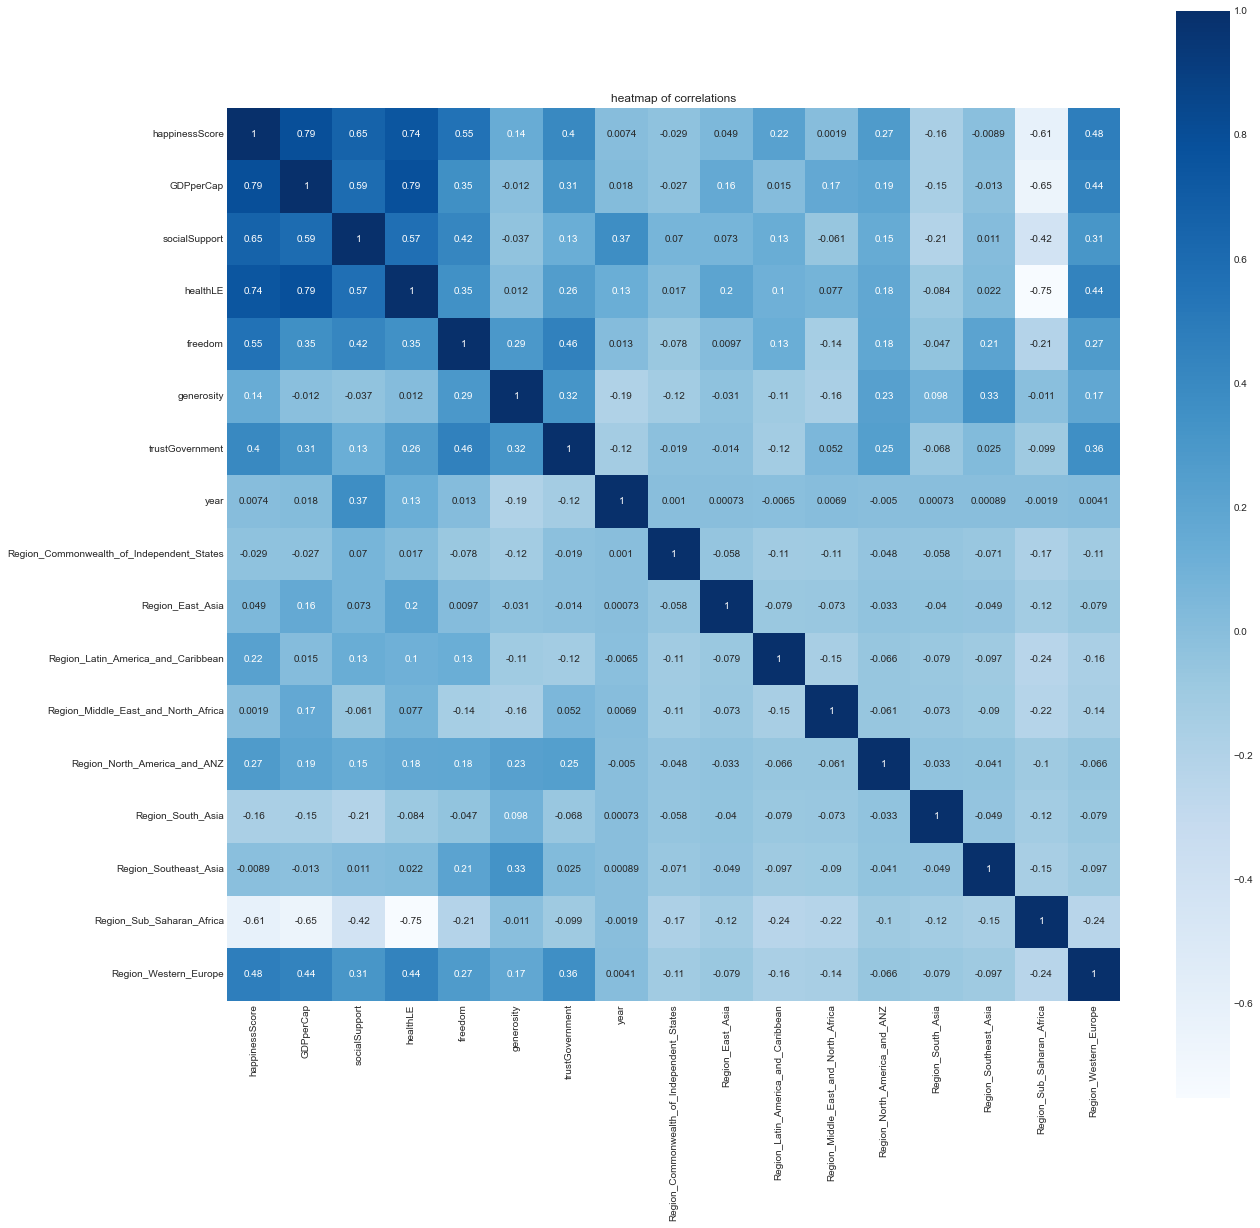

In [13]:
plt.figure(figsize = (20, 20))
sns.heatmap(wh.corr(),annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')#heatmap of correlations
plt.title('heatmap of correlations')

There are high correlation between GDP per capita and health life expectancy is 0.75, close to 0.8. 

3.1) d) Variable Selection

Cosidering the collinearity, it's worthwhile to do a variable selection.

Number of predictors =  1
Features selected by forward sequential selection: Index(['GDPperCap'], dtype='object')
0.5042052183518226
Number of predictors =  2
Features selected by forward sequential selection: Index(['GDPperCap', 'freedom'], dtype='object')
0.38549591290155555
Number of predictors =  3
Features selected by forward sequential selection: Index(['GDPperCap', 'Region_Latin_America_and_Caribbean', 'freedom'], dtype='object')
0.34276465450212334
Number of predictors =  4
Features selected by forward sequential selection: Index(['GDPperCap', 'Region_Latin_America_and_Caribbean',
       'Region_Western_Europe', 'freedom'],
      dtype='object')
0.31677543729581875
Number of predictors =  5
Features selected by forward sequential selection: Index(['GDPperCap', 'Region_Latin_America_and_Caribbean',
       'Region_North_America_and_ANZ', 'Region_Western_Europe', 'freedom'],
      dtype='object')
0.292484599618281
Number of predictors =  6
Features selected by forward sequential s

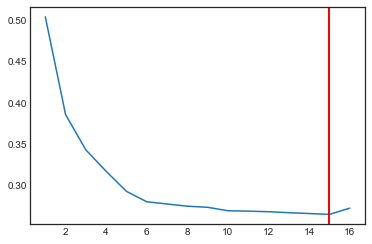

In [14]:
cv_errors = []
for degree in range(1, len(X.columns)):
    model= LinearRegression()
    sfs = SequentialFeatureSelector(model, 
                                    n_features_to_select = degree, 
                                    direction="forward",
                                    scoring='neg_mean_squared_error',
                                    cv= 10) 
    sfs = sfs.fit(X,y)
    feature_names= X.columns
    print('Number of predictors = ', degree)
    print("Features selected by forward sequential selection: "+str(feature_names[sfs.get_support()]))
    score = -mean(cross_val_score(LinearRegression(), X[feature_names[sfs.get_support()]], y, scoring='neg_mean_squared_error', cv=10))
    print(score)
    cv_errors.append(score)

print('Add the linear regression with all predictors')
print(X.columns)
cv_errors.append(linear_MSE_all) # since the sfs only selects to maximum one less than the whole linear regression, I need to add it.
cv_errors = np.array(cv_errors)

plt.figure()
sns.lineplot(x = range(1, len(X.columns)+1), y = cv_errors) 
plt.axvline(x=np.argmin(cv_errors)+1, linewidth=2, color='r') # the argmax returns the index, so needs to add 1

The linear regression works best are 15 predictors -- dropping the year.I guess this is because year is too large for other predictors. As the plot below shows, the trend is very slight.

<AxesSubplot:xlabel='year', ylabel='happinessScore'>

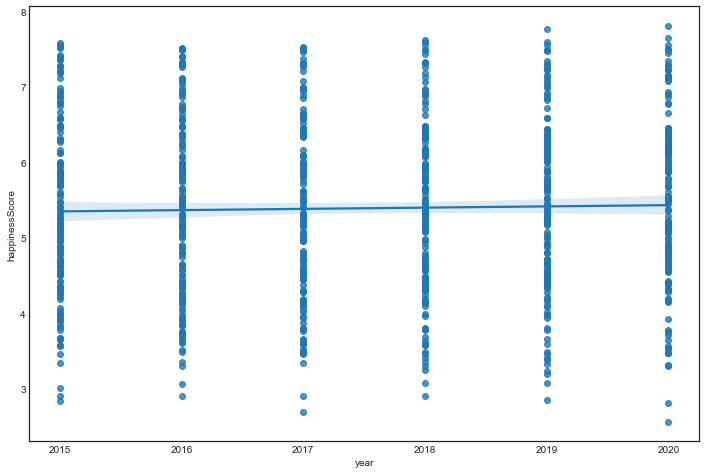

In [15]:
wh = pd.read_csv("worldHapinness_2015_2020.csv")
plt.figure(figsize = (12,8))
sns.regplot(x = 'year', y = 'happinessScore', data = wh)

In [16]:
# save the best mse for linear regression
linear_MSE = np.min(cv_errors)

#### 3.2  Polynomial models
Since the year is dropped by the linear regression, I drop it before fitting the polynomial models on the datasets.

Degree: 1
Train MSE:  0.23527739593449937
Test MSE:  0.23813776346737553
Degree: 2
Train MSE:  0.15110812994834788
Test MSE:  0.19953236121381734
Degree: 3
Train MSE:  0.05905442118145335
Test MSE:  1.0736275487806939
Degree: 4
Train MSE:  9.141689119439964e-23
Test MSE:  151.64249639800613


Text(2, 5, 'The best degree:2')

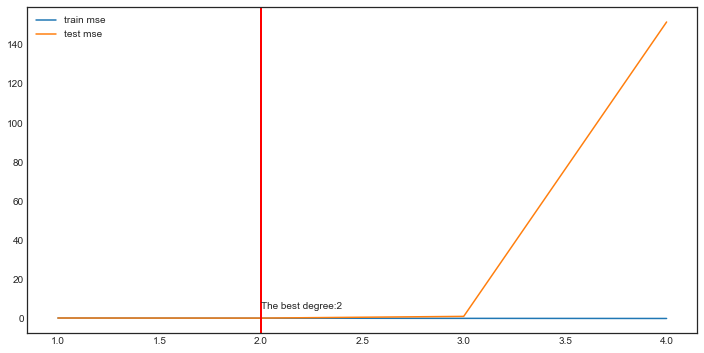

In [17]:
# polynomial fit
train_mses_poly = []
test_mses_poly = []
def train_poly(i):
    # prepare the poly data
    poly_model = PolynomialFeatures(degree=i)
    X_poly_train = poly_model.fit_transform(X_train.drop('year', axis = 1))
    X_poly_test = poly_model.fit_transform(X_test.drop('year', axis = 1))
    
    # train it
    lm_poly = LinearRegression()
    lm_poly.fit(X_poly_train, y_train)
    y_pred_poly = lm_poly.predict(X_poly_train)
    
    # get the mse
    print('Degree:', i)
    print('Train MSE: ', mean_squared_error(y_train, y_pred_poly))
    train_mses_poly.append(mean_squared_error(y_train, y_pred_poly))
    y_pred_poly = lm_poly.predict(X_poly_test)
    print('Test MSE: ', mean_squared_error(y_test, y_pred_poly))
    test_mses_poly.append(mean_squared_error(y_test, y_pred_poly))


for degree in range(1,5):
    train_poly(degree)

plt.figure(figsize = (12,6))
sns.lineplot(range(1,5), train_mses_poly,label = 'train mse')
sns.lineplot(range(1,5), test_mses_poly,label = 'test mse')
plt.legend()
plt.axvline(range(1,5)[np.argmin(test_mses_poly)], linewidth=2, color='r')
plt.text(2, 5, 'The best degree:'+ str(range(1,5)[np.argmin(test_mses_poly)]))


--> The polynomial model with degree 2 has the smallest test MSE.

#### 3.3  Lasso Regression

In [18]:
model_lasso = Lasso(tol=1e-4,max_iter=1000000)
errors= []
coeficents = []

alphas = np.logspace(-5, 5, 300) # the alphas to select from
for a in alphas:
    # train the model
    model_lasso.set_params(alpha=a)
    model_lasso.fit(X, y) 
    
    # get the cv error
    CV_error = np.mean(cross_val_score(model_lasso, X, y, cv=30, scoring='neg_mean_squared_error')) # use the training set excluding 2020 to cross validate
    coeficents.append(model_lasso.coef_)
    errors.append(CV_error)

In [19]:
error = np.abs(errors)
print("Min error: ", np.min(error))
lasso_minerr = np.min(error)
index_minerr = (np.where(error == np.min(error))[0])+1
print("Best alpha: ", alphas[index_minerr])

Min error:  0.25805915748785807
Best alpha:  [1.08005237e-05]


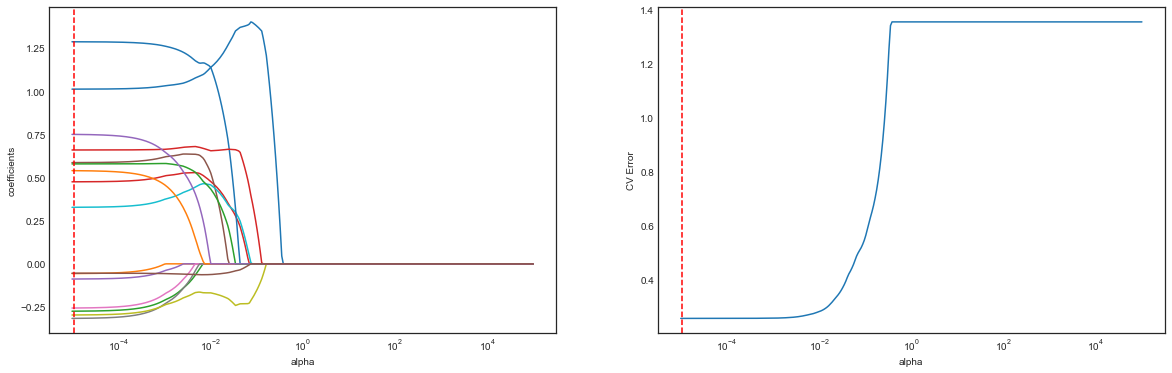

In [20]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coeficents)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, error)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV Error')
plt.axis('tight')

plt.show()

The Lasso regression did not perform shrinkage very much.

#### 3.4  Ridge Regression

In [21]:
model_ridge = Ridge()
errors= []
coeficents = []

alphas = np.logspace(-5, 5, 300)
for a in alphas:
    # train the model
    model_ridge.set_params(alpha=a)
    model_ridge.fit(X, y)
    
    # get the cv error
    CV_error = np.mean(cross_val_score(model_ridge, X, y, cv=10, scoring='neg_mean_squared_error'))
    coeficents.append(model_ridge.coef_)
    errors.append(CV_error)

In [22]:
error = np.abs(errors)
print("Min error: ", np.min(error))
ridge_minError = np.min(error)
index_minerr = (np.where(error == np.min(error))[0])
print("Best alpha: ", alphas[index_minerr])

Min error:  0.27214162772023787
Best alpha:  [0.02784941]


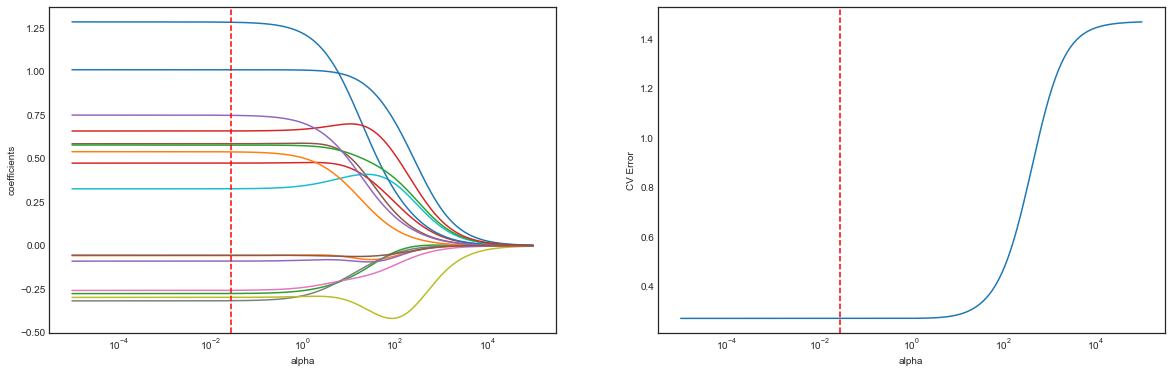

In [23]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coeficents)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, error)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV Error')
plt.axis('tight')

plt.show()

The Ridge performed shrinkage more than Lasso.

---

#### 3.5 Model selection

In [24]:
print("MSE for Linear Regression: ",linear_MSE)
print("MSE for Polynomial Regression: ",test_mses_poly[1])
print("MSE for Ridge Regression: ",ridge_minError)
print("MSE for Lasso Regression: ",lasso_minerr)

MSE for Linear Regression:  0.2645436698659458
MSE for Polynomial Regression:  0.19953236121381734
MSE for Ridge Regression:  0.27214162772023787
MSE for Lasso Regression:  0.25805915748785807


The Polynomial Regression has the lowest MSE, therefore works best for this training dataset from 2015-2019. 

#### 3.6 Make prediction

In [25]:
# Get the models that performed the best
# Linear model
lm = LinearRegression()
lm.fit(X.drop('year', axis = 1), y)

# Polynomial model
poly_model = PolynomialFeatures(degree=2)
X_poly = poly_model.fit_transform(X.drop('year', axis = 1)) 
lm_poly = LinearRegression()
lm_poly.fit(X_poly, y)
 
# Lasso model
model_lasso.set_params(alpha=alphas[index_minerr])
model_lasso.fit(X, y)

# Ridge model
model_ridge.set_params(alpha=alphas[index_minerr])
model_ridge.fit(X, y)

# Get the 2020 data ready for prediction and validation
X_2020 = data_2020[data_2020.columns.difference(['happinessScore'])]
poly_model = PolynomialFeatures(degree=2)
X_poly_2020 = poly_model.fit_transform(X_2020.drop('year', axis = 1))

# Make predictions
y_2020 = data_2020['happinessScore']
y_true = y_2020
y_predict_linear = lm.predict(X_2020.drop('year', axis = 1))
y_predict_poly = lm_poly.predict(X_poly_2020)
y_predict_lasso = model_lasso.predict(X_2020)
y_predict_ridge = model_ridge.predict(X_2020)

# Check the results
linear_score = mean_squared_error(y_2020, y_predict_linear)
linear_r2_score = r2_score(y_2020, y_predict_linear)
poly_score = mean_squared_error(y_2020, y_predict_poly)
poly_r2_score = r2_score(y_2020, y_predict_poly)
lasso_score = mean_squared_error(y_2020, y_predict_lasso)
lasso_r2_score = r2_score(y_2020, y_predict_lasso)
ridge_score = mean_squared_error(y_2020, y_predict_ridge)
ridge_r2_score = r2_score(y_2020, y_predict_ridge)

print("{:18s}|{:10s}|{:10s}".format("Model", "MSE", "R_2"))
print("{:18s}|{:10.5f}|{:10.5f}".format("Linear model", linear_score, linear_r2_score))
print("{:18s}|{:10.5f}|{:10.5f}".format("Polynomial model", poly_score, poly_r2_score))
print("{:18s}|{:10.5f}|{:10.5f}".format("Lasso model", lasso_score, lasso_r2_score))
print("{:18s}|{:10.5f}|{:10.5f}".format("Ridge model", ridge_score, ridge_r2_score))


Model             |MSE       |R_2       
Linear model      |   0.26547|   0.78400
Polynomial model  |   0.20792|   0.83083
Lasso model       |   0.38581|   0.68609
Ridge model       |   0.28906|   0.76481


It turns out the polynomial regression indeed works best for prediction 2020. It has an R_2 of the highest 0.831.


In [26]:
# get the top 10 countries and last 10 countries
wh = pd.read_csv("worldHapinness_2015_2020.csv")
wh = wh.dropna(axis=0) # drop na
data_2020 = wh[wh.year == 2020]
scores_2020 = pd.Series(y_predict_poly, index = data_2020.country)
print('The predicted scores for the top 10 most happy countries are:')
print(scores_2020.sort_values(ascending=False)[:10])
print('\nThe predicted scores for the bottom 10 least happy countries are:')
print(scores_2020.sort_values()[:10])

The predicted scores for the top 10 most happy countries are:
country
Norway         7.624388
Switzerland    7.581788
Denmark        7.541639
Ireland        7.501164
Sweden         7.495333
Netherlands    7.464685
Luxembourg     7.434423
New Zealand    7.379551
Finland        7.358726
Canada         7.353231
dtype: float64

The predicted scores for the bottom 10 least happy countries are:
country
Afghanistan                 3.044917
Central African Republic    3.341381
South Sudan                 3.548982
Rwanda                      3.604639
Burundi                     3.633020
Madagascar                  3.740873
Togo                        3.774142
Benin                       3.818953
Malawi                      3.827641
Comoros                     3.851093
dtype: float64


---

### Task4 Classification

**4)a) Data processing**

In [27]:
wh = pd.read_csv("worldHapinness_2015_2020.csv")
wh = wh.dropna(axis=0) # drop nas
wh = wh.drop(['country'], axis = 1)
wh.columns = wh.columns.str.replace(' ', '_')

# recode the region column
f=lambda x: x.replace('-', '')
col=wh['Regional_indicator'].apply(f) 
wh['Regional_indicator'] = col 
f=lambda x: x.replace(' ', '')
col=wh['Regional_indicator'].apply(f) 
wh['Regional_indicator'] = col 

print(wh.head(5))
X = wh[wh.columns.difference(['Regional_indicator'])]
y = wh['Regional_indicator']
labels = []
for i in range(0, len(wh.Regional_indicator.unique())):
    labels.append(wh.Regional_indicator.unique()[i])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

  Regional_indicator  happinessScore  GDPperCap  socialSupport  healthLE  \
0      WesternEurope           7.769      1.340          1.587     0.986   
1      WesternEurope           7.600      1.383          1.573     0.996   
2      WesternEurope           7.554      1.488          1.582     1.028   
3      WesternEurope           7.494      1.380          1.624     1.026   
4      WesternEurope           7.488      1.396          1.522     0.999   

   freedom  generosity  trustGovernment  year  
0    0.596       0.153            0.393  2019  
1    0.592       0.252            0.410  2019  
2    0.603       0.271            0.341  2019  
3    0.591       0.354            0.118  2019  
4    0.557       0.322            0.298  2019  


**4)b) KNN model**

First, I need find what k best fits the data.

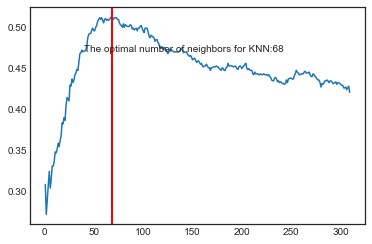

In [28]:
kmax = int(len(y)/3)
k_values = range(1,kmax)
accuracy_values = []
for k in k_values:
    kmodel = KNeighborsClassifier(n_neighbors = k)
    accuracy_values.append(mean(cross_val_score(kmodel, X, y, scoring='accuracy', cv = 10))) # Gets the accuracy for every iteration of k

plt.figure()
plt.plot(k_values, accuracy_values)
kbest = k_values[np.argmax(accuracy_values)]
plt.axvline(kbest, linewidth=2, color='r')
plt.text(40, 0.47, 'The optimal number of neighbors for KNN:'+ str(k_values[np.argmax(accuracy_values)]))
plt.show()

The k with the best performance is 68. I can use it to get the model for classification.

Accuracy for cross validation:  0.5129146648364218
                                 precision    recall  f1-score   support

        CentralandEasternEurope      0.306     0.478     0.373        23
CommonwealthofIndependentStates      0.000     0.000     0.000        13
                       EastAsia      0.000     0.000     0.000         9
       LatinAmericaandCaribbean      0.365     0.731     0.487        26
       MiddleEastandNorthAfrica      0.500     0.087     0.148        23
             NorthAmericaandANZ      0.000     0.000     0.000         9
                      SouthAsia      0.000     0.000     0.000         5
                  SoutheastAsia      0.000     0.000     0.000         8
               SubSaharanAfrica      0.612     0.911     0.732        45
                  WesternEurope      0.500     0.538     0.519        26

                       accuracy                          0.465       187
                      macro avg      0.228     0.275     0.226       18

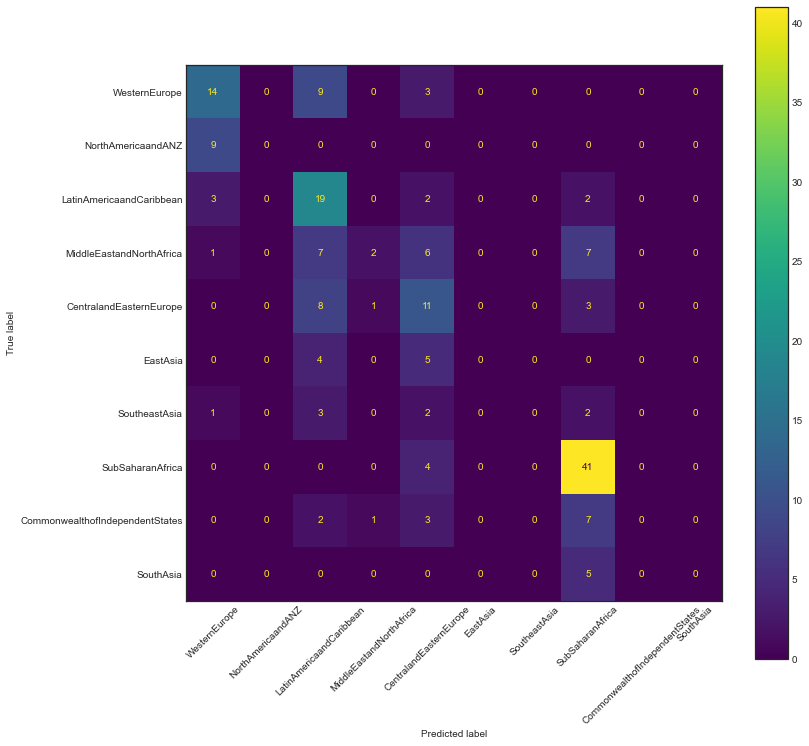

In [29]:
kmodel = KNeighborsClassifier(n_neighbors = kbest) # Set number of neighbors to the best k
kmodel.fit(X_train, y_train) # Fit the model
y_pred = kmodel.predict(X_test) 
knn_accuracy = np.mean(cross_val_score(kmodel, X, y, cv=10))
print('Accuracy for cross validation: ', knn_accuracy) 
conf_matrix = confusion_matrix(y_test, y_pred, labels= labels)
print(classification_report(y_test, y_pred, digits=3))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels= labels)

# plt a bigger plot
fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(111) 
disp.plot(xticks_rotation = 45, ax = ax1)
plt.show()

The accuracy is 0.46, and 0.51 for cross validation.This inconsistency is caused by the random split of train and test dataset. The model is not very good. It predicts all North Amarican countries to Europe, suggesting they are similar in country development status.Middle east and North Africa is misclassified to Latin Amarica and Central East Europe.
The possible reason is that KNN classifies X into category K if Yk is most around X. Therefore, if two A and B are similar, and A outnumbers B, then most B will be classified by A, which is what we have seen in the predictions.

**4)c) Naive Bayes**

Accuracy for cross validation:  0.5687371310912834
                                 precision    recall  f1-score   support

        CentralandEasternEurope      0.514     0.826     0.633        23
CommonwealthofIndependentStates      0.385     0.385     0.385        13
                       EastAsia      0.000     0.000     0.000         9
       LatinAmericaandCaribbean      0.760     0.731     0.745        26
       MiddleEastandNorthAfrica      0.500     0.261     0.343        23
             NorthAmericaandANZ      0.667     0.889     0.762         9
                      SouthAsia      0.000     0.000     0.000         5
                  SoutheastAsia      0.100     0.125     0.111         8
               SubSaharanAfrica      0.900     0.800     0.847        45
                  WesternEurope      0.500     0.500     0.500        26

                       accuracy                          0.572       187
                      macro avg      0.432     0.452     0.433       18

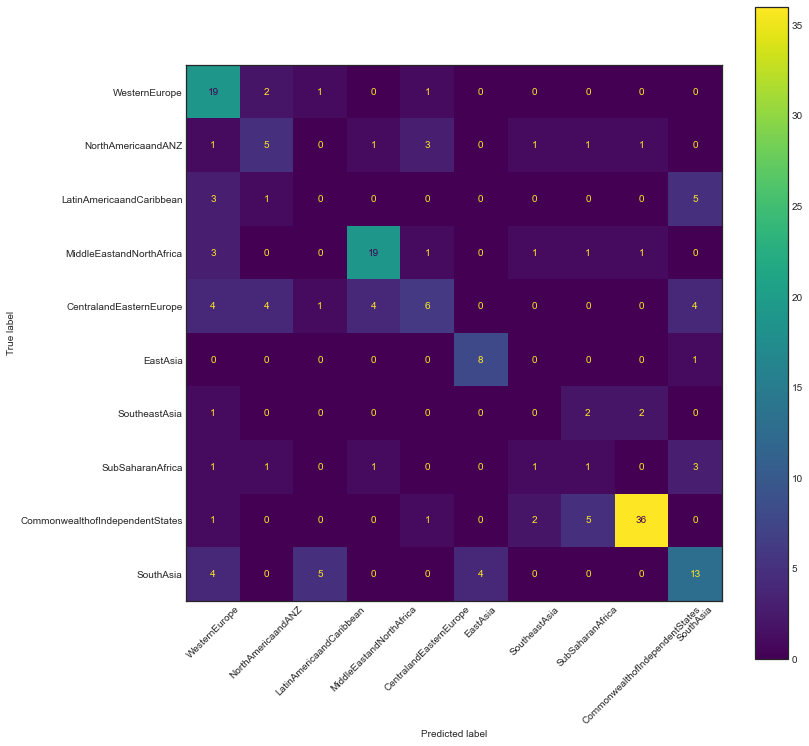

In [30]:
modelNB = GaussianNB()
nb_accuracy = np.mean(cross_val_score(modelNB, X, y, cv=10))
print("Accuracy for cross validation: ",nb_accuracy)
nb_hf = GaussianNB()
nb_pred = nb_hf.fit(X_train, y_train).predict(X_test)
cm_hf = confusion_matrix(y_test,nb_pred)
print(classification_report(y_test, nb_pred, digits=3))
dissplay_cm_hf = ConfusionMatrixDisplay(confusion_matrix=cm_hf,
                                        display_labels= labels)
# plt a bigger plot
fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(111) 
dissplay_cm_hf.plot(xticks_rotation = 45, ax = ax1)
plt.show()

The accuracy is 0.56, which is better. It also makes mistakes on North Amarica, Central and Eastern Europe and South Asia, but it makes mistakes in a way that is not so concentrated on a particular category. It misclassifies them to different categories.

**4)d) Logistic Regression**

Accuracy for cross validation:  0.5676618622740792
[[14  0  0  1  7  0  0  0  0  1]
 [ 1  1  0  2  7  0  0  0  2  0]
 [ 1  1  0  0  5  0  0  0  0  2]
 [ 2  1  0 19  1  0  0  0  2  1]
 [ 6  1  0  1  9  0  0  0  1  5]
 [ 0  0  0  0  0  0  0  0  0  9]
 [ 1  0  0  0  0  0  0  1  3  0]
 [ 1  0  0  0  1  0  0  1  2  3]
 [ 1  0  0  0  0  0  1  3 40  0]
 [ 5  0  0  0  1  0  0  0  0 20]]
                                 precision    recall  f1-score   support

        CentralandEasternEurope      0.438     0.609     0.509        23
CommonwealthofIndependentStates      0.250     0.077     0.118        13
                       EastAsia      0.000     0.000     0.000         9
       LatinAmericaandCaribbean      0.826     0.731     0.776        26
       MiddleEastandNorthAfrica      0.290     0.391     0.333        23
             NorthAmericaandANZ      0.000     0.000     0.000         9
                      SouthAsia      0.000     0.000     0.000         5
                  SoutheastAsia  

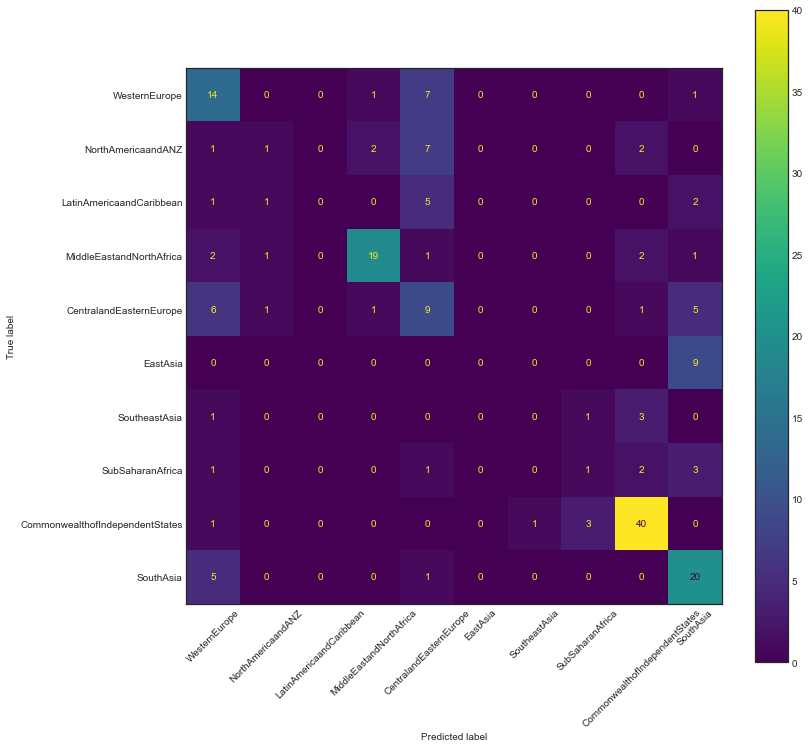

In [31]:
lrmodel = LogisticRegression(max_iter = 1000)
lrmodel.fit(X_train, y_train)
y_pred = lrmodel.predict(X_test)
lr_accuracy = np.mean(cross_val_score(lrmodel, X, y, cv=10))
print('Accuracy for cross validation: ', lr_accuracy) 

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(classification_report(y_test, y_pred, digits=3))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels= labels)

# plt a bigger plot
fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(111) 
disp.plot(xticks_rotation = 45, ax = ax1)
plt.show()

**4)e) Model Comparison**

In [32]:
# Unable to draw a tpr vs fpr curve because it's restricted to a binary classification.
# roc for Naive Bayes Classifier
nb_probs = nb_hf.predict_proba(X)
nb_auc = roc_auc_score(y, nb_probs, multi_class = 'ovr') 
# ovo stands for One-vs-one. It computes the average AUC of all possible pairwise combinations of classes
# the alternative ovr stands for One-vs-rest. It Computes the AUC of each class against the rest. This treats the multiclass case in the same way as the multilabel case.
# Since there are large regions and small regions, it's sensitive to class imbalance, and I should use ovr.

# roc for KNN Classifier
knn_probs = kmodel.predict_proba(X)
knn_auc = roc_auc_score(y, knn_probs, multi_class = 'ovr')

# roc for LogisticRegression Classifier
lr_probs = lrmodel.predict_proba(X)
lr_auc = roc_auc_score(y, lr_probs, multi_class = 'ovr')


print("{:18s}|{:10s}|{:10s}".format("Model", "auc", "accuracy"))
print("{:18s}|{:10.5f}|{:10.5f}".format("Naive Bayes", nb_auc, nb_accuracy))
print("{:18s}|{:10.5f}|{:10.5f}".format("KNN", knn_auc, knn_accuracy))
print("{:18s}|{:10.5f}|{:10.5f}".format("LogisticRegression", lr_auc, lr_accuracy))

Model             |auc       |accuracy  
Naive Bayes       |   0.90618|   0.56874
KNN               |   0.86487|   0.51291
LogisticRegression|   0.89119|   0.56766


Naive Bayes works best. However, all the models performly not so well. This is probably because some developed countries are really similar in North America and Europe countries, which makes it really hard to classify with these limited information.

---

### REFERENCES

**List any references you used to complete your homework. Even if they are one of the books assigned for this class. If this section is incomplete you will be deducted 50% of your final grade from this homework.**

https://www.geeksforgeeks.org/plot-a-vertical-line-in-matplotlib/

https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/



https://blog.csdn.net/u014662865/article/details/59058039

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

Introduction to Statistical Learning Chapter 1-6

homework 1,2

lab 1,2

Classifation exercise part 2

**Note: if there are no comments to explain your code you will receive 0 in this homework**

### Total Score:  --/50

### END OF HOMEWORK 2